# Florida Bike Rental Demand Analysis
## A Comprehensive Time Series Analysis and Predictive Modeling Project

**Author:** Caitlin Driscoll 
**Date:** May 2025
**GitHub:** Cait-Dris
**License:** MIT

### Project Overview
This project analyzes bike rental patterns in Florida using hourly rental data to:
- Identify temporal patterns and seasonality
- Understand weather impact on rental demand
- Build predictive models for demand forecasting
- Provide actionable insights for bike rental operations

### Dataset Information
- **Source:** Florida Bike Rentals, Fullstack provided Dataset
- **Time Period:** 12/01/2017 to 11/30/2018
- **Observations:** 8,760 hourly records
- **Features:** 14 variables including weather, temporal, and rental data

## Table of Contents
1. [Introduction](#1-introduction)
2. [Data Import and Setup](#2-data-import-and-setup)
3. [Exploratory Data Analysis](#3-exploratory-data-analysis)
4. [Data Preprocessing](#4-data-preprocessing)
5. [Feature Engineering](#5-feature-engineering)
6. [Modeling](#6-modeling)
7. [Model Evaluation](#7-model-evaluation)
8. [Conclusions and Recommendations](#8-conclusions)
9. [Future Work](#9-future-work)

In [121]:

"""
## 2. Data Import and Setup
### 2.1 Required Libraries
"""

# Standard libraries
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Statistical analysis
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Set style parameters
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✓ Libraries imported successfully")
print(f"Python version: {sys.version}")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✓ Libraries imported successfully


NameError: name 'sys' is not defined

### Task 1: Feature engineering 

1. Analyze the provided dataset and select relevant features
2. Create new features such as: 
    - Interaction features
3. Encode categorical variables and handle missing values
4. Scale the numerical features using StandardScaler
5. Save the processed dataset as "bike_rental_features.csv"

### 1. Data Loading 

In [98]:
try:
    df = pd.read_csv('FloridaBikeRentals.csv', encoding='latin-1')
    print("Successfully read with latin-1 encoding.")
except UnicodeDecodeError:
    print("latin-1 failed. Trying cp1252...")
    try:
        df = pd.read_csv('FloridaBikeRentals.csv', encoding='cp1252')
        print("Successfully read with cp1252 encoding.")
    except UnicodeDecodeError:
        print("cp1252 failed. Trying utf-16...")
        try:
            df = pd.read_csv('FloridaBikeRentals.csv', encoding='utf-16')
            print("Successfully read with utf-16 encoding.")
        except UnicodeDecodeError:
            print("All common encodings failed. You might need to detect the encoding or clean the file.")

Successfully read with latin-1 encoding.


### Inspecting The Dataset
---

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [100]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [101]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30-11-2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30-11-2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30-11-2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30-11-2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30-11-2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [102]:
df['Functioning Day'].value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

In [103]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [104]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [105]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
numerical_features

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [106]:
categorical_features = df.select_dtypes(include='object').columns.tolist()
categorical_features

['Date', 'Seasons', 'Holiday', 'Functioning Day']

### Converting Date 
---

In [107]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [108]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['dayofweek'] = df['Date'].dt.dayofweek

In [109]:
df = df.drop('Date', axis = 1)

In [110]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day,dayofweek
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4


### Encode Categorical Variables
---

In [111]:
df['Is_Holiday'] = df['Holiday'].apply(lambda x: 1 if x == 'Holiday' else 0)
df['Is_Functioning Day'] = df['Functioning Day'].apply(lambda x: 1 if x == 'Yes' else 0)

In [112]:
df = pd.get_dummies(df, columns=['Seasons'])

In [113]:
df_encoded = df.drop(['Holiday', 'Functioning Day'], axis = 1)

In [114]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  year                       8760 non-null   int32  
 11  month                      8760 non-null   int32  
 12  day                        8760 non-null   int32  
 13  dayofweek                  8760 non-null   int32

### Creating Interaction Features
---

In [115]:
df_encoded['Temp_Humidity_Interaction'] = df_encoded['Temperature(°C)'] * df_encoded['Humidity(%)']
df_encoded['Temp_WindSpeed_Interaction'] = df_encoded['Temperature(°C)'] * df_encoded['Wind speed (m/s)']
df_encoded['Is_NonFunctioning_Holiday'] = ((df_encoded['Is_Holiday'] == 1) & (df_encoded['Is_Functioning Day'] == 0)).astype(int)
df_encoded['Is_Weekend'] = df_encoded['dayofweek'].isin([5, 6]).astype(int)
df_encoded['Hour_Temperature'] = df_encoded['Hour'] * df_encoded['Temperature(°C)']
df_encoded['Month_Temperature'] = df_encoded['month'] * df_encoded['Temperature(°C)']
df_encoded['Hour_Rainfall'] = df_encoded['Hour'] * df_encoded['Rainfall(mm)']
df_encoded['Winter_Temperature'] = df_encoded['Seasons_Winter'] * df_encoded['Temperature(°C)']
df_encoded['Autumn_Temperature'] = df_encoded['Seasons_Autumn'] * df_encoded['Temperature(°C)']
df_encoded['Summer_Temperature'] = df_encoded['Seasons_Summer'] * df_encoded['Temperature(°C)']
df_encoded['Spring_Temperature'] = df_encoded['Seasons_Spring'] * df_encoded['Temperature(°C)']
df_encoded["Hour_Humidity_Interaction"] = df_encoded["Hour"] * df_encoded["Humidity(%)"]
df_encoded["Hour_Visibility_Interaction"] = df_encoded["Hour"] * df_encoded["Visibility (10m)"]

In [116]:
df_encoded.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),year,month,day,dayofweek,Is_Holiday,Is_Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Temp_Humidity_Interaction,Temp_WindSpeed_Interaction,Is_NonFunctioning_Holiday,Is_Weekend,Hour_Temperature,Month_Temperature,Hour_Rainfall,Winter_Temperature,Autumn_Temperature,Summer_Temperature,Spring_Temperature,Hour_Humidity_Interaction,Hour_Visibility_Interaction
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,2017,12,1,4,0,1,False,False,False,True,-192.4,-11.44,0,0,-0.0,-62.4,0.0,-5.2,-0.0,-0.0,-0.0,0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,2017,12,1,4,0,1,False,False,False,True,-209.0,-4.40,0,0,-5.5,-66.0,0.0,-5.5,-0.0,-0.0,-0.0,38,2000
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2017,12,1,4,0,1,False,False,False,True,-234.0,-6.00,0,0,-12.0,-72.0,0.0,-6.0,-0.0,-0.0,-0.0,78,4000
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,2017,12,1,4,0,1,False,False,False,True,-248.0,-5.58,0,0,-18.6,-74.4,0.0,-6.2,-0.0,-0.0,-0.0,120,6000
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,2017,12,1,4,0,1,False,False,False,True,-216.0,-13.80,0,0,-24.0,-72.0,0.0,-6.0,-0.0,-0.0,-0.0,144,8000


### Scale the numerical features using StandardScaler
---

In [117]:
#scaler = StandardScaler()
#df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

In [118]:
#df_scaled.head()

### Save the processed dataset as "bike_rental_features.csv"
---

In [119]:
df_encoded.to_csv("bike_rental_features.csv", index=False)

## Task 2: Model building 

1. Implement various regression models including: 
    * Linear Regression
    * Ridge Regression (L2 Regularization)
    * Lasso Regression (L1 Regularization)
    * Elastic Net Regression
2. Perform hyperparameter tuning using GridSearchCV
3. Evaluate model performance using: 
    * Mean Absolute Error (MAE)
    * Mean Squared Error (MSE)
    * R-squared (R²)

In [88]:
df = pd.read_csv("bike_rental_features.csv")

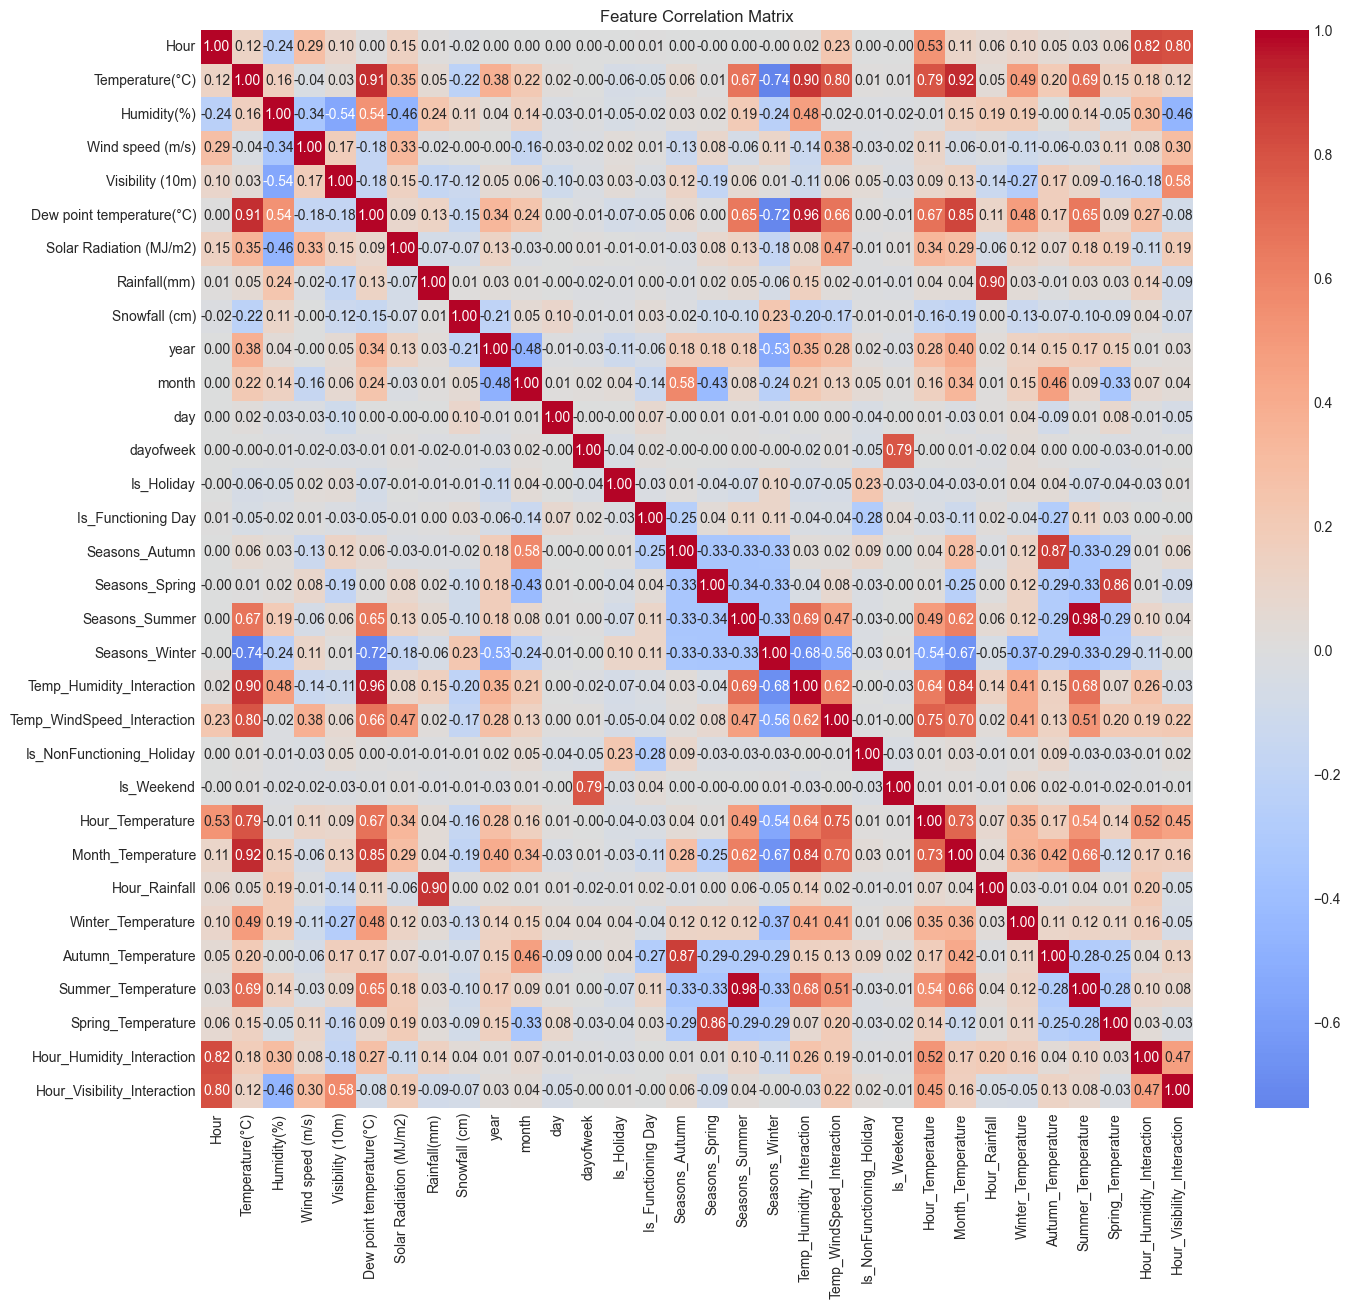

In [89]:
corr_matrix = df.drop('Rented Bike Count', axis=1).corr()

plt.figure(figsize=(16,14))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

## Linear Regression
___

In [90]:
X = df.drop(['Rented Bike Count', 'Dew point temperature(°C)', 'year', 'dayofweek', 'Visibility (10m)', 'Seasons_Autumn' ] , axis = 1)
y = df['Rented Bike Count']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # fit and transform train
X_test_scaled = scaler.transform(X_test)

In [93]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [94]:
y_pred = linear_model.predict(X_test_scaled)

In [95]:
LR_mae = mean_absolute_error(y_test, y_pred)
LR_mse = mean_squared_error(y_test, y_pred)
LR_r2 = r2_score(y_test, y_pred)

print(f" --Linear Model Performance-- ")
print(f"  - Mean Absolute Error (MAE): {LR_mae:.2f}")
print(f"  - Mean Squared Error (MSE): {LR_mse:.2f}")
print(f"  - R² Score: {LR_r2:.4f}")

 --Linear Model Performance-- 
  - Mean Absolute Error (MAE): 276.65
  - Mean Squared Error (MSE): 154466.79
  - R² Score: 0.6293


📊 MAE (Mean Absolute Error) Lower is better. But in this case we are rocking a 277.47 which is telling us we are off by 277 bike rentals per hour which is not good. What we can do to try and improve our model is to fine tune our feature engineering, or to try with Ridge and Lasso.

📊 MSE (Mean Squared Error) – Penalizes larger errors more than MAE. Lower values indicate a better fit. Our MSE 156454.17 is at  which is also not ideal and ways we can improve this are by trying polynomial regression

📊 R² Score – Represents how well the model explains the variance in the data. The model explains about 62.45% of the variance in bike rentals, meaning it's capturing some important patterns but leaving quite a bit unexplained.

In [96]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("\nFeature importances (by absolute coefficient value):")
print(coef_df)

NameError: name 'model' is not defined

In [ ]:
errors = abs(y_test - y_pred)

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c=errors, cmap='coolwarm')
plt.plot(np.arange(min(y_test), max(y_test)), np.arange(min(y_test), max(y_test)), color='red', linestyle='--')
plt.xlabel("Actual Rented Bike Count", fontsize = 14, fontweight = 'bold')
plt.ylabel("Predicted Rented Bike Count", fontsize = 14, fontweight = 'bold')
plt.title("Actual vs. Predicted Bike Rentals", fontsize = 16, fontweight = 'bold')
plt.show()

### Ridge Regression (L2 Regularization)
      (Helps Reduce Overfitting)
---

In [ ]:
ridge = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]} 

In [ ]:
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

In [ ]:
best_alpha = grid_search.best_params_['alpha']
print(f"Best Alpha: {best_alpha}")

In [ ]:
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train_scaled, y_train)

In [ ]:
y_pred = ridge_best.predict(X_test_scaled)

Ridge_mae = mean_absolute_error(y_test, y_pred)
Ridge_mse = mean_squared_error(y_test, y_pred)
Ridge_r2 = r2_score(y_test, y_pred)

print(f" --Ridge Regression Performance--")
print(f"  - Mean Absolute Error (MAE): {Ridge_mae:.2f}")
print(f"  - Mean Squared Error (MSE): {Ridge_mse:.2f}")
print(f"  - R² Score: {Ridge_r2:.4f}")
print(f"---------------------------------")
print(f"Impact of Ridge Regression on (MAE): {(LR_mae - Ridge_mae) : .2f}")
print(f"Impact of Ridge Regression on (MSE): {(LR_mse - Ridge_mse) : .2f}")
print(f"Impact of Ridge Regression on (R²): {(LR_r2 - Ridge_r2) : .2f}")

### 🔑 Key Takeaway From Ridge Regression Performance

    📊 MAE: Is predicting .03 better
    📊 MSE: Large errors have been reduced by 16.85
    📊 R²:  Is unchanged
   * We can now assume that the features may already be realitively well-conditioned and the model is not overfitting which is great!

### Lasso Regression (L1 Regularization)
---

In [ ]:
lasso_model = Lasso(alpha=1, max_iter=15000).fit(X_train_scaled, y_train)
lasso_model

In [ ]:
print("Lasso intercept:", lasso_model.intercept_)
print('______________________________________')
print("Lasso coefficients:", lasso_model.coef_)

In [ ]:
y_pred = lasso_model.predict(X_train_scaled)
Lasso_mae_train = mean_absolute_error(y_train, y_pred)
Lasso_mse_train = mean_squared_error(y_train, y_pred)
Lasso_r2_train = r2_score(y_train, y_pred)

print(f" --Lasso Regression Training Performance--")
print(f"  - Mean Absolute Error (MAE): {Lasso_mae_train:.2f}")
print(f"  - Mean Squared Error (MSE): {Lasso_mse_train:.2f}")
print(f"  - R² Score: {Lasso_r2_train:.4f}")
print(f"------------------------------------------")

y_pred = lasso_model.predict(X_test_scaled)
Lasso_mae_test = mean_absolute_error(y_test, y_pred)
Lasso_mse_test = mean_squared_error(y_test, y_pred)
Lasso_r2_test = r2_score(y_test, y_pred)


print(f" --Lasso Regression Testing Performance--")
print(f"  - Mean Absolute Error (MAE): {Lasso_mae_test:.2f}")
print(f"  - Mean Squared Error (MSE): {Lasso_mse_test:.2f}")
print(f"  - R² Score: {Lasso_r2_test:.4f}")

In [ ]:
alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=45000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_scaled, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Lasso coefficients as a function of alpha');


In [ ]:
lasso_cv_model = LassoCV(alphas = np.logspace(-4, 2, 100), cv =10, max_iter=45000, n_jobs=-1).fit(X_train_scaled, y_train)

In [ ]:
lasso_cv_model.alpha_

In [ ]:
lasso_tuned = Lasso(alpha= lasso_cv_model.alpha_ , max_iter=45000).fit(X_train_scaled, y_train)

In [ ]:
lasso_tuned

In [ ]:
pred_train_tuned = lasso_tuned.predict(X_train_scaled)
tuned_mae_train = mean_absolute_error(y_train, pred_train_tuned)
tuned_mse_train = mean_squared_error(y_train, pred_train_tuned)
tuned_r2_score_train = r2_score(y_train, pred_train_tuned)

print(f" --Lasso(Tuned) Regression Training Performance--")
print('MAE training set post tuning', round(tuned_mae_train, 2))
print('MSE training set post tuning', round(tuned_mse_train, 2))
print('R squared training set post tuning', round((tuned_r2_score_train)*100,2))
print("---------------------------")

# Test data
pred_test_tuned = lasso_tuned.predict(X_test_scaled)
tuned_mae_test =mean_absolute_error(y_test, pred_test_tuned)
tuned_mse_test =mean_squared_error(y_test, pred_test_tuned)
tuned_r2_score_test = r2_score(y_test, pred_test_tuned)

print(f" --Lasso(Tuned) Regression Testing Performance--")
print('MAE test set post tuning', round(tuned_mae_test, 2))
print('MSE test set post tuning', round(tuned_mse_test, 2))
print('R squared test set post tuning', round((tuned_r2_score_test)*100,2))
print("--------------------------------------------------")

print(f"Impact of Tuned Lasso Regression:")
print(f"  - Reduction in MAE: {(LR_mae - tuned_mae_test): .4f}")
print(f"  - Reduction in MSE: {(LR_mse - tuned_mse_test): .4f}")
print(f"  - Improvement in R² Score: {(LR_r2 - tuned_r2_score_test): .4f}")

### 🔑 Key Takeaway From Lasso Regression Performance

    📊 MAE: Predictions Improved by .0316 
    📊 MSE: Errors reduced by 11.6216
    📊 R²:  Is unchanged meaning tuning had a limited effect on variance explanation.
    
   * We can now assume that while the tuning process adjusted regularization, it didn’t drastically improve predictive performance.

In [ ]:
feature_names = X.columns  
lasso_coefs = lasso_tuned.coef_
selected_features = [feature for feature, coef in zip(feature_names, lasso_coefs) if coef != 0]

In [ ]:
selected_features

In [ ]:
lasso_coefs = np.abs(lasso_tuned.coef_)

# Sort features by importance
sorted_indices = np.argsort(lasso_coefs)[::-1] 
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_importance = lasso_coefs[sorted_indices]

# Plot feature importance
plt.figure(figsize=(14, 10))
plt.barh(sorted_features, sorted_importance, color="steelblue")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.title("Lasso Feature Importance")
plt.gca().invert_yaxis()
plt.show()

### Elastic Net Regression
---

In [ ]:
elastic_net_cv = ElasticNetCV(l1_ratio=np.linspace(0.1, 1, 10), alphas=np.logspace(-3, 0, 50),  cv=5, max_iter=10000)
elastic_net_cv.fit(X_train_scaled, y_train)

print(f"Best Alpha: {elastic_net_cv.alpha_}")
print(f"Best L1 Ratio: {elastic_net_cv.l1_ratio_}")

In [ ]:
elastic_net = ElasticNet(alpha= elastic_net_cv.alpha_, l1_ratio= elastic_net_cv.l1_ratio_ , max_iter=65000)
elastic_net.fit(X_train_scaled, y_train)

In [ ]:
y_pred = elastic_net.predict(X_test_scaled)

Elastic_mae = mean_absolute_error(y_test, y_pred)
Elastic_mse = mean_squared_error(y_test, y_pred)
Elastic_r2 = r2_score(y_test, y_pred)

print(f" --Elastic Net Regression Performance--")
print(f"MAE: {Elastic_mae}")
print(f"MSE: {Elastic_mse}")
print(f"R² Score: {Elastic_r2}")
print("----------------------------------------")
      
print(f"Impact of Elastic Net Regression:")
print(f"  - Reduction in MAE: {(LR_mae - Elastic_mae): .4f}")
print(f"  - Reduction in MSE: {(LR_mse - Elastic_mse): .4f}")
print(f"  - Improvement in R² Score: {(LR_r2 - Elastic_r2): .4f}")

### 🔑 Key Takeaways Of Elastic Regression Performance

     📊 MAE: Predictions Improved by .0537. 
     📊 MSE: Improved by 33.8816 larger errors were reduced meaning more stable predictions.
     📊 R²:  Is unchanged meaning limited effect on variance explanation.
    
    * Elastic Net retained more features than Lasso but didn’t significantly alter overall performance.

    * Slight MSE improvement suggests better handling of large fluctuations.

    * No major R² shift means both models explain roughly the same rental patterns.

In [ ]:
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': elastic_net_cv.coef_})
coef_df = coef_df[coef_df['Coefficient'] != 0]  # Keep only selected features
coef_df.sort_values(by="Coefficient", key=abs, ascending=False, inplace=True)
print(coef_df)

---
## Task 3: Model building with polynomial features (45 mins)

1. Create polynomial features for selected numerical columns
2. Train models with polynomial features to capture non-linear relationships
3. Compare results with linear models to assess improvements
4. Save the best-performing model

In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [ ]:
poly

In [ ]:
start = time.time()
ridge_poly = RidgeCV(alphas=np.logspace(-3, 2, 50)).fit(X_train_poly, y_train)
end = time.time()

print(f"RidgeCV training took {end - start:.2f} seconds")

ridge_poly

In [ ]:
print(f"Best Alpha: {ridge_poly.alpha_}")

In [ ]:
selected_columns = ['Hour',  
                    'Seasons_Summer' , 
                    'Hour_Temperature', 
                    'Summer_Temperature', 
                    'Spring_Temperature', 
                    'Temp_Humidity_Interaction', 
                    'Hour_Humidity_Interaction', 
                    'Is_Functioning Day',  
                    'Rainfall(mm)', 
                    'Temperature(°C)',
                    'Seasons_Winter', 
                    'Seasons_Spring'
                   ]  

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_selected = X_train_scaled_df[selected_columns]
X_test_selected = X_test_scaled_df[selected_columns]

In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_train_poly_selected = poly.fit_transform(X_train_selected)
X_test_poly_selected = poly.transform(X_test_selected)

In [ ]:
poly

In [ ]:
start = time.time()
ridge_poly = RidgeCV(alphas=np.logspace(-3, 2, 50))
ridge_poly.fit(X_train_poly_selected, y_train)
end = time.time()

print(f"RidgeCV training took {end - start:.2f} seconds")

ridge_poly

In [ ]:
start = time.time()
lasso_poly = LassoCV(alphas=np.logspace(-4, -3, 10), cv=2, max_iter=650000, tol=1e-3, selection="random", n_jobs=-1)
lasso_poly.fit(X_train_poly_selected, y_train)
end = time.time()

print(f"LassoCV training took {end - start:.2f} seconds")

In [ ]:
print(f"Best Alpha: {lasso_poly.alpha_}")

In [ ]:
start = time.time()
elastic_net_poly = ElasticNetCV(l1_ratio=np.linspace(0.1, 0.9, 5), alphas=np.logspace(-4, -3, 20), cv=2, max_iter=1_200_000, tol=1e-2, selection="random", n_jobs=-1)
elastic_net_poly.fit(X_train_poly_selected, y_train)
end = time.time()

print(f"ElasticNetCV training took {end - start:.2f} seconds")
print(elastic_net_poly)

In [ ]:
print(f"Best Alpha: {elastic_net_poly.alpha_}")
print(f"Best L1 Ratio: {elastic_net_poly.l1_ratio_}")

In [ ]:
models_poly = {
    "Ridge Poly": ridge_poly,
    "Lasso Poly": lasso_poly,
    "Elastic Net Poly": elastic_net_poly
}

for name, model in models_poly.items():
    y_pred_test = model.predict(X_test_poly_selected)
    print(f"--{name} Test Performance--")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred_test):.2f}")
    print(f"R² Score: {r2_score(y_test, y_pred_test):.4f}")
    print("-" * 30)

---
## Task 4: Model evaluation and validation (45 mins)

1. Perform cross-validation techniques to validate model performance (on both models- With Polynomial Features and without Polynomial Features)
2. Assess models using test data
3. Compare results across different regression models


In [ ]:
models = {
    "Linear": linear_model,
    "Ridge": ridge_best,
    "Lasso": lasso_tuned,
    "Elastic Net": elastic_net,
    "Ridge Poly": ridge_poly,
    "Lasso Poly": lasso_poly,
    "Elastic Net Poly": elastic_net_poly
}

cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train_poly_selected, y_train, cv=5, scoring="neg_mean_absolute_error")
    cv_results[name] = -scores.mean() 
    print(f"{name} MAE (Cross-Validation): {cv_results[name]:.2f}")


test_results = {}

for name, model in models.items():
    y_pred_test = model.predict(X_test_poly_selected)
    
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    
    test_results[name] = [mae_test, mse_test, r2_test]
    
    print(f"\n--{name} Test Performance--")
    print(f"MAE: {mae_test:.2f}")
    print(f"MSE: {mse_test:.2f}")
    print(f"R² Score: {r2_test:.4f}")
    print("-" * 30)


df_results = pd.DataFrame.from_dict(test_results, orient='index', columns=["MAE", "MSE", "R² Score"])
df_results["CV MAE"] = [cv_results[model] for model in df_results.index]  # Add Cross-Validation MAE
df_results = df_results.sort_values(by="MAE")  # Rank models by lowest error
print("\nFinal Model Performance Comparison:")
print(df_results)


best_model_name = df_results.index[0] 
best_model = models[best_model_name]
joblib.dump(best_model, "best_polynomial_model.pkl")

print(f"\nBest model '{best_model_name}' saved as 'best_polynomial_model.pkl'.")

---
## Task 5: Reporting and insights (30 mins)

1.    Summarize findings and key takeaways from the analysis
2.    Discuss feature importance and business implications
3.    Provide recommendations for further improvements

### 📊 Key Takeaways:

1. We see that with our Linear Regression Model adding Ridge + Lasso + Elastic Net we can reduce large errors that occur which helps our reduce our MSE. On the other hand it does not help our variance in predictabilty with our R2 score.

2. When we fit for polynomial features using Ridge we can see a quick processing time of just under 4secs. Meanwhile with Lasso + ElasticNet the time to train these models is extrememly long. The complexity of the polynomial features and the number of alpha values being explored can further contribute to the longer training time for Lasso + Elastic Net  CVmodels. These long training times can cost the business money.

3. Recommendations for further improvements would be to continue to take detailed data of weather patterns since weather seems to have a big impact on how the models run.


### 🔑 Key Takeaway From Ridge Regression Performance

    📊 MAE: Is predicting .03 better
    📊 MSE: Large errors have been reduced by 16.85
    📊 R²:  Is unchanged
   * We can now assume that the features may already be realitively well-conditioned and the model is not overfitting which is great!

### 🔑 Key Takeaway From Lasso Regression Performance

    📊 MAE: Predictions Improved by .0316 
    📊 MSE: Errors reduced by 11.6216
    📊 R²:  Is unchanged meaning tuning had a limited effect on variance explanation.
    
   * We can now assume that while the tuning process adjusted regularization, it didn’t drastically improve predictive performance.

### 🔑 Key Takeaways Of Elastic Regression Performance

     📊 MAE: Predictions Improved by .0537. 
     📊 MSE: Improved by 33.8816 larger errors were reduced meaning more stable predictions.
     📊 R²:  Is unchanged meaning limited effect on variance explanation.
    
    * Elastic Net retained more features than Lasso but didn’t significantly alter overall performance.

    * Slight MSE improvement suggests better handling of large fluctuations.

    * No major R² shift means both models explain roughly the same rental patterns.